In [1]:
import numpy as np
import pandas as pd
#from sklearn.metrics import r2_score,mean_squared_error
from matplotlib import pyplot as plt
import utils as ut
%matplotlib inline

/Users/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


## SA STEP2

In [4]:
path='SA-MD1-STEP2_bnd/' #10% variance
params='sample_matrix.csv'
model='results.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params)

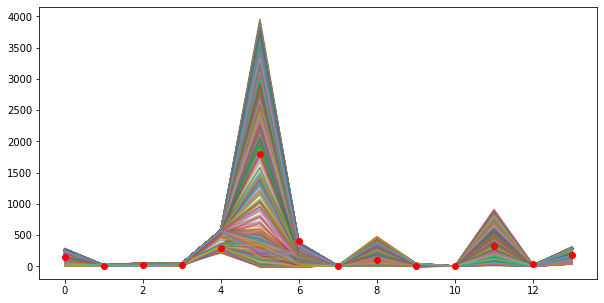

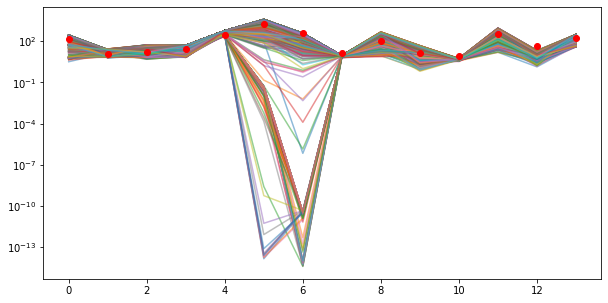

In [5]:
ut.spaghetti_match_plot(df_model)
ut.spaghetti_match_plot(df_model,logy=True)

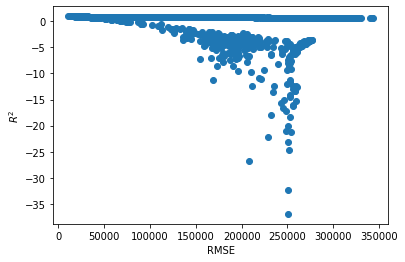

In [6]:
ut.plot_r2_rmse(df_model)

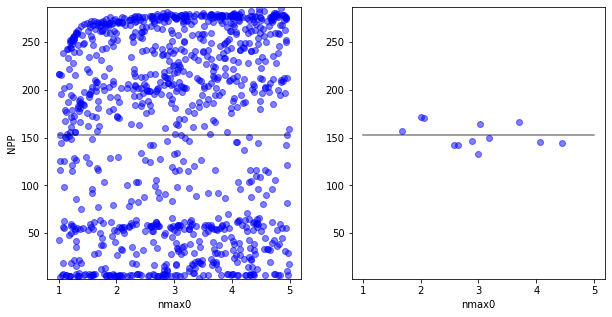

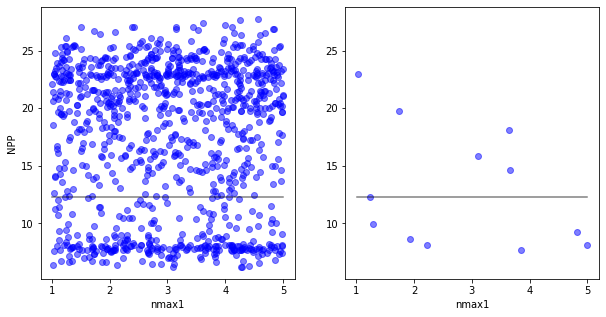

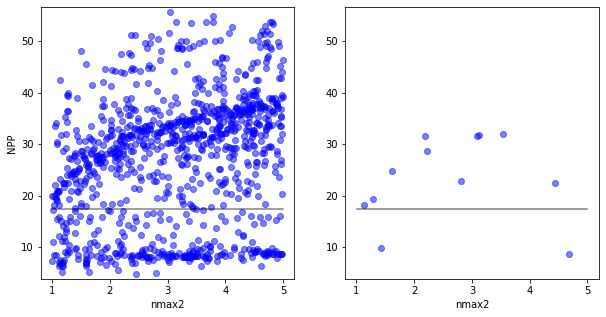

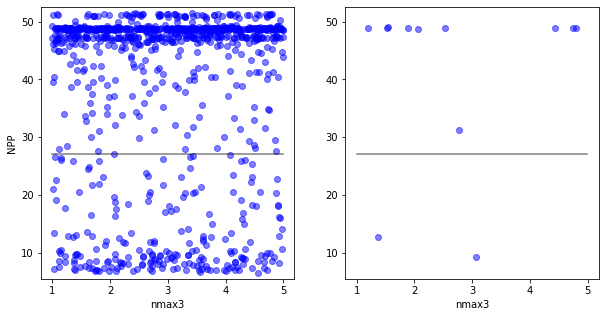

In [9]:
for i in range(4):
    ut.plot_paramcvstarget(df_param,df_model,i,r2lim=0.93,xlabel='nmax'+str(i),ylabel='NPP')

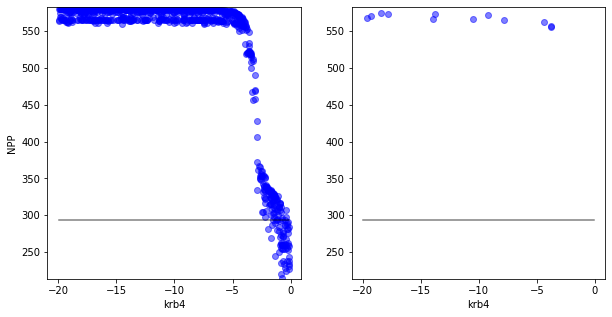

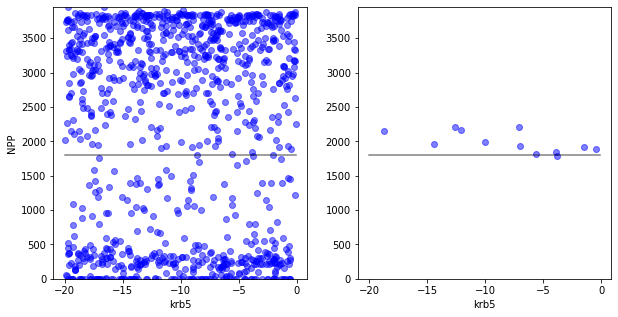

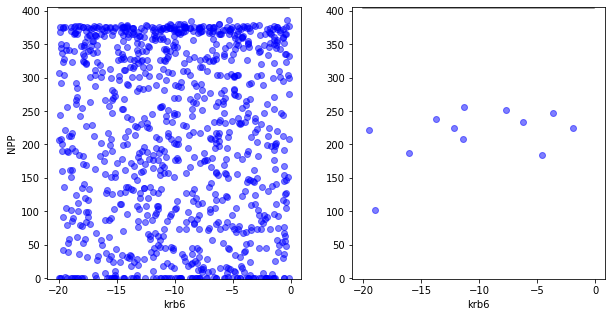

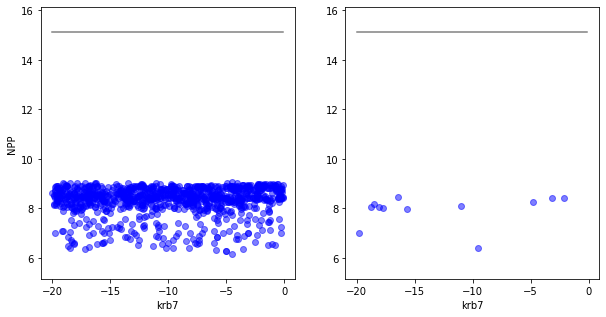

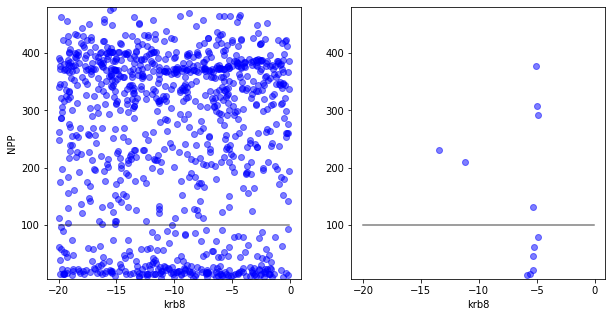

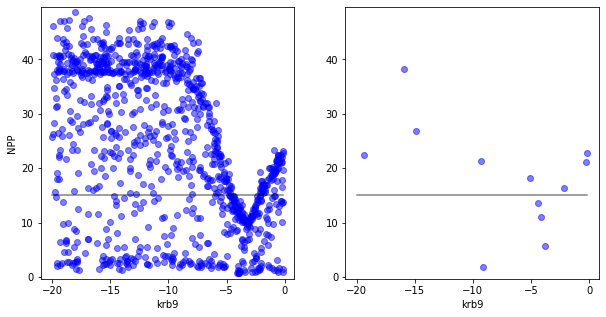

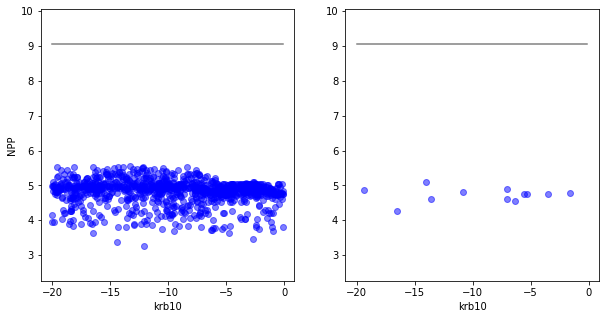

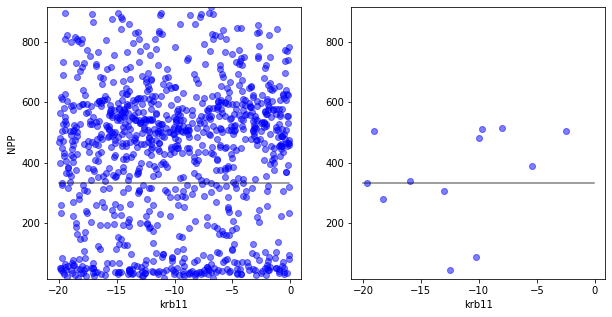

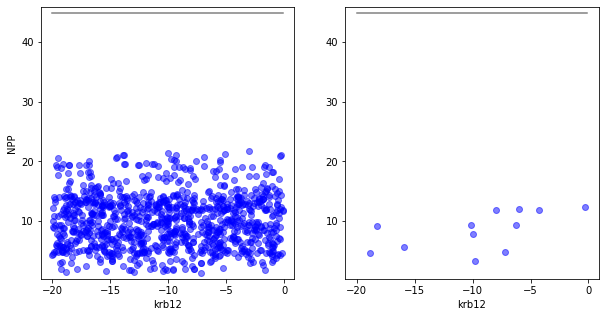

In [11]:
for i in range(4,13):
    ut.plot_paramcvstarget(df_param,df_model,i,r2lim=0.93,xlabel='krb'+str(i),ylabel='NPP')

## SA STEP2 bnd

In [2]:
path='SA-MD1-STEP2/' #10% variance
params='sample_matrix.csv'
model='results.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params)

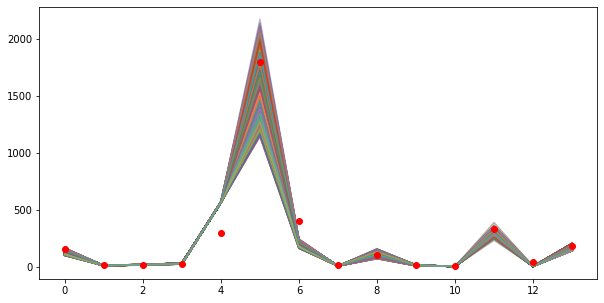

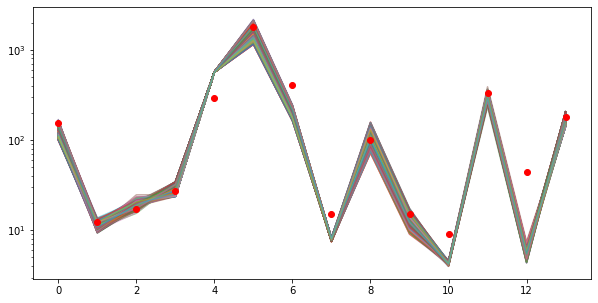

In [3]:
ut.spaghetti_match_plot(df_model)
ut.spaghetti_match_plot(df_model,logy=True)

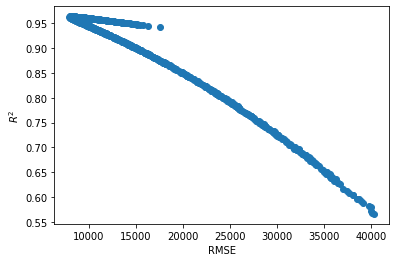

In [4]:
ut.plot_r2_rmse(df_model)

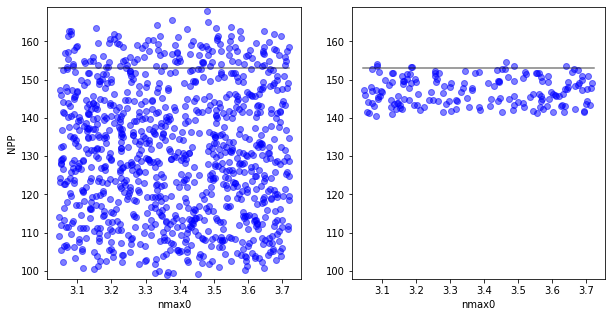

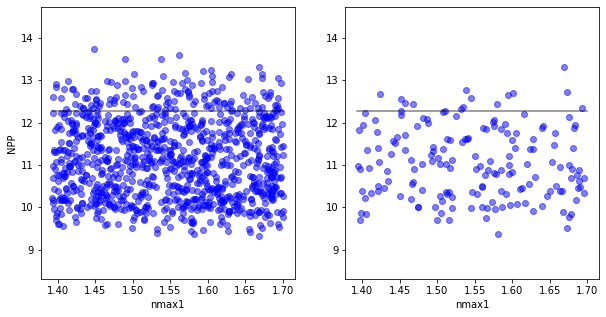

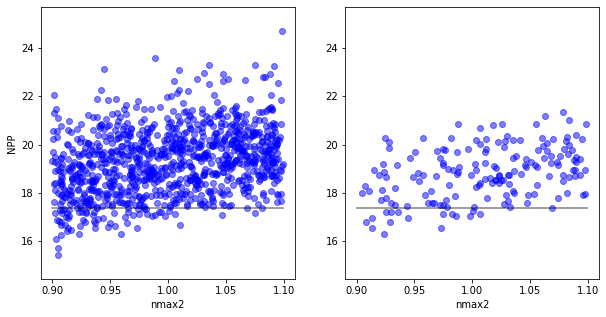

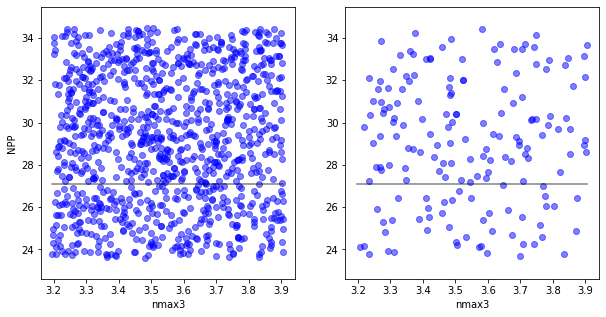

In [6]:
for i in range(4):
    ut.plot_paramcvstarget(df_param,df_model,i,r2lim=0.96,xlabel='nmax'+str(i),ylabel='NPP')

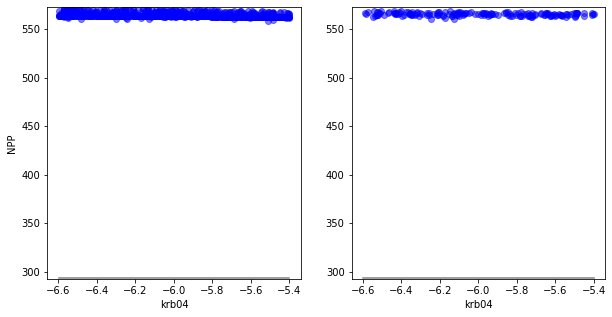

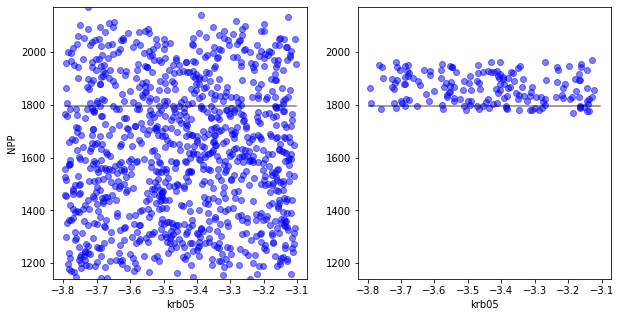

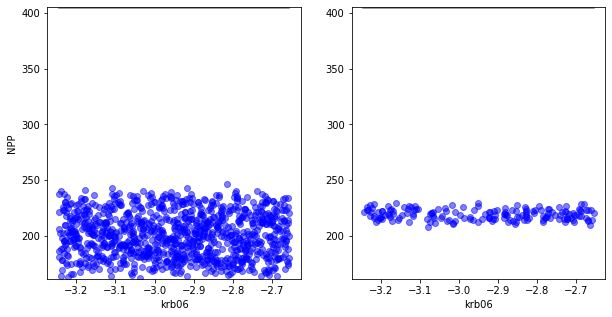

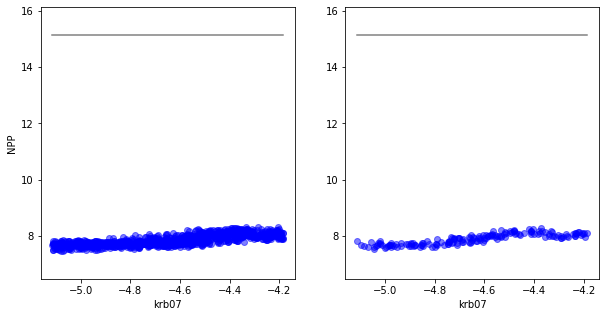

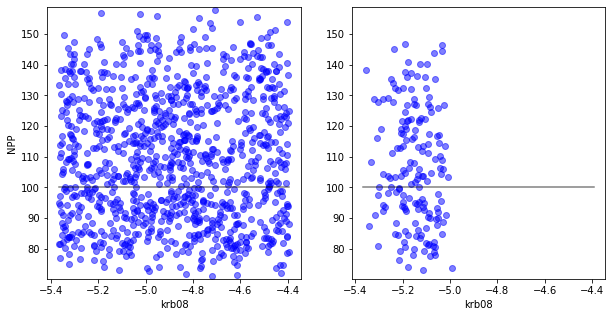

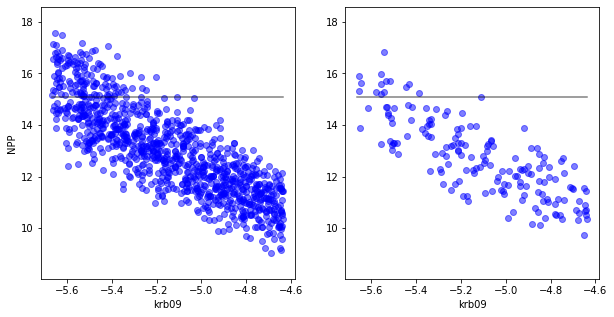

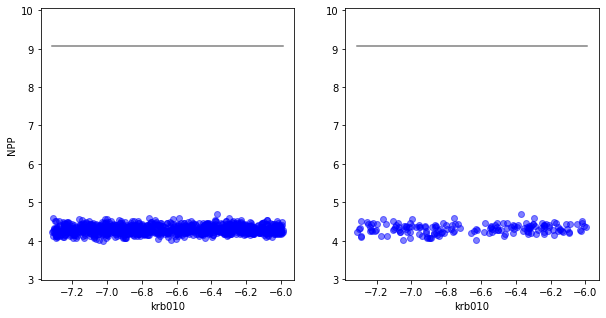

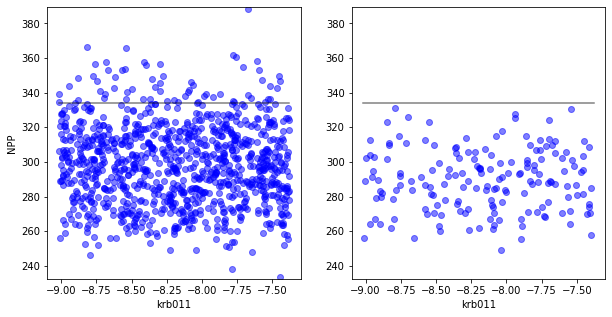

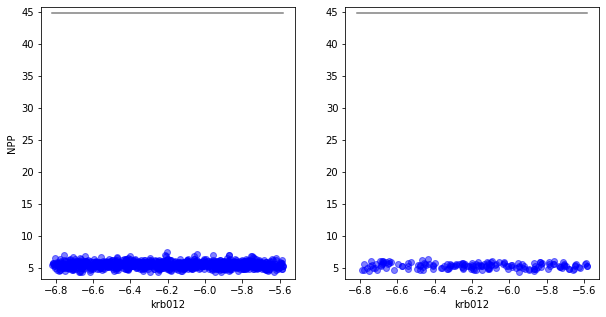

In [18]:
for i in range(4,13):
    plot_paramsvstarget(df_param,df_model,r2,i,r2lim=0.96,xlabel='krb0'+str(i),ylabel='NPP')

## SA STEP1

In [12]:
path='SA-MD1-STEP1/'
params='sample_matrix.csv'
model='results.txt'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params)

In [13]:
df_param.head()

,cmax,cmax.1,cmax.2,cmax.3
0,304.672433,196.092846,288.617103,108.042352
1,171.394909,51.222722,61.658618,147.982790
2,442.861783,151.861485,49.029722,163.470253
3,583.949853,61.493824,103.332041,46.044853
4,261.797349,118.444634,187.567088,62.143091


In [14]:
df_model.head()

,0,1,2,3
0,247.941825,43.630780,63.702678,62.791961
1,139.592580,10.593281,13.564094,83.261826
2,368.682895,32.804915,10.911346,95.112943
3,477.904659,13.882124,23.064703,26.608003
4,204.237388,25.607911,41.812459,36.036832


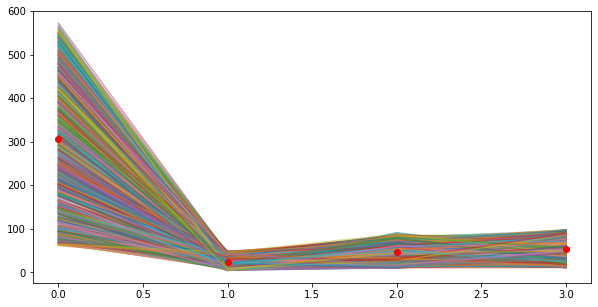

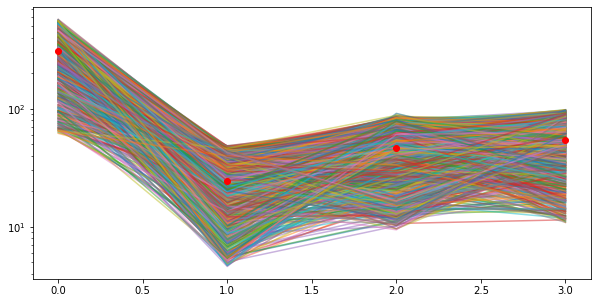

In [16]:
ut.spaghetti_match_plot(df_model)
ut.spaghetti_match_plot(df_model,logy=True)

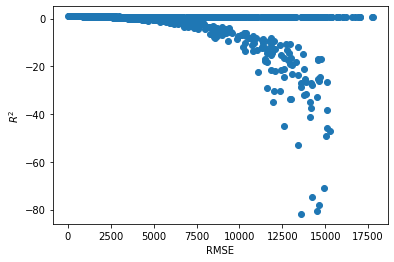

In [17]:
ut.plot_r2_rmse(df_model)

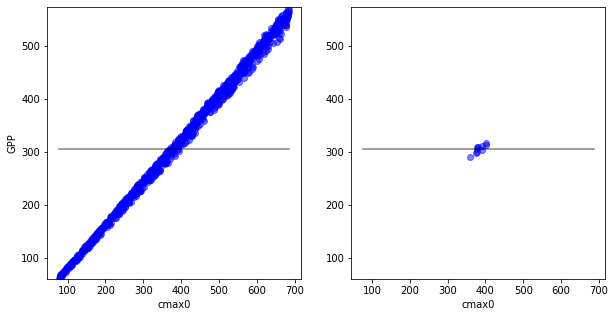

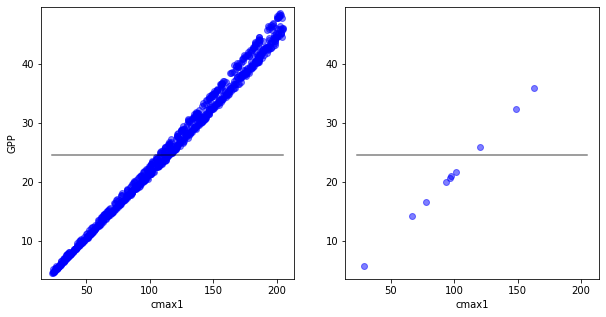

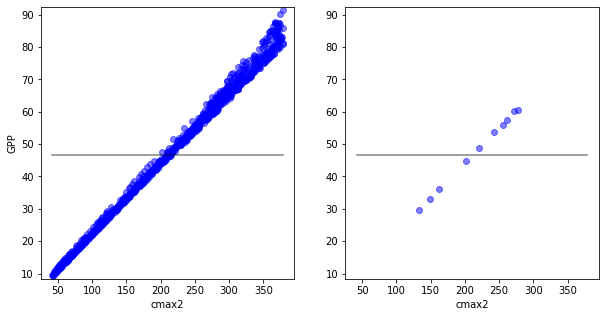

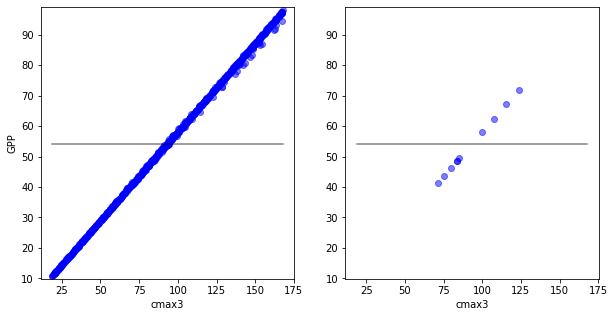

In [21]:
for i in range(4):
    ut.plot_paramcvstarget(df_param,df_model,i, \
                r2lim=0.99,xlabel='cmax'+str(i),ylabel='GPP')

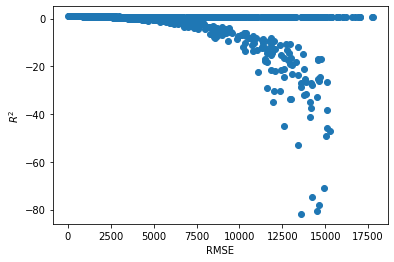

In [14]:
[n,m]=np.shape(df_model)
r2=[r2_score(df_model.iloc[i,:], df_model.iloc[-1,:]) for i in range(n-1)]
rmse=[mean_squared_error(df_model.iloc[i,:], df_model.iloc[-1,:]) for i in range(n-1)]
r2=np.asarray(r2)
rmse=np.asarray(rmse)
plt.plot(rmse,r2,'o'), plt.xlabel('RMSE'), plt.ylabel('$R^2$');

In [ ]:
this is dominate by the cmax0, how to grab other values assuming they are disjoint

In [2]:
path='MD1/csv/'
model='out_step1.csv'
params='param_step1.csv'
model='out_step2.csv'
params='param_step2.csv'
model='out_step2-old3.csv'
params='param_step2-old3.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params,header=None)